# Computing features with MusicExtractor

[MusicExtractor](http://essentia.upf.edu/documentation/reference/std_MusicExtractor.html) is a multi-purpose algorithm for music audio feature extraction from files (see the complete list of computed features [here](http://essentia.upf.edu/documentation/streaming_extractor_music.html)). It combines many algorithms and provides the same functionality as the command-line Music Extractor, which is a wrapper of this algorithm.

As an input, the algorithm requires a filename to analyze. All the computed features are stored in two output Pools, for raw frames data and the aggregated statistics across frames. You can access any particular feature in these pools for your needs or store them in files for future use.

You can see one of the previous versions of MusicExtractor in use in the [AcousticBrainz](https://acousticbrainz.org/) database, where it is used to compute the low-level data for each track submission.

In [3]:
audiofile = '../../../test/audio/recorded/dubstep.mp3'

# This is how the audio we want to process sounds like.
import IPython
IPython.display.Audio(audiofile)

In [4]:
import essentia
import essentia.standard as es

# Compute all features.
# Aggregate 'mean' and 'stdev' statistics for all low-level, rhythm, and tonal frame features.
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'], 
                                              rhythmStats=['mean', 'stdev'], 
                                              tonalStats=['mean', 'stdev'])(audiofile)

# See all feature names in the pool in a sorted order
print(sorted(features.descriptorNames()))


['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

We can then access particular values in the pools:

In [5]:
print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):", 
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])
    

Filename: dubstep.mp3
--------------------------------------------------------------------------------
Replay gain: -13.247243881225586
EBU128 integrated loudness: -10.77892780303955
EBU128 loudness range: 0.7203598022460938
--------------------------------------------------------------------------------
MFCC mean: [-6.6916754e+02  8.3628136e+01  2.3836292e+01 -4.4610019e+00
  8.3065739e+00 -1.1081966e+00  6.7006445e+00  9.5169401e+00
  1.6557934e+00  9.0660133e+00 -5.7823056e-01  5.5514116e+00
 -4.1337581e+00]
--------------------------------------------------------------------------------
BPM: 139.71859741210938
Beat positions (sec.) [0.44117913 0.88235825 1.3235373  1.7414966  2.1710658  2.6006348
 3.030204   3.459773   3.8893423  4.3189116  4.760091   5.1780496
 5.607619   6.037188   6.4551473 ]
--------------------------------------------------------------------------------
Key/scale estimation (using a profile specifically suited for electronic music): C# minor


We can assess frame values for audio features computed on frames:

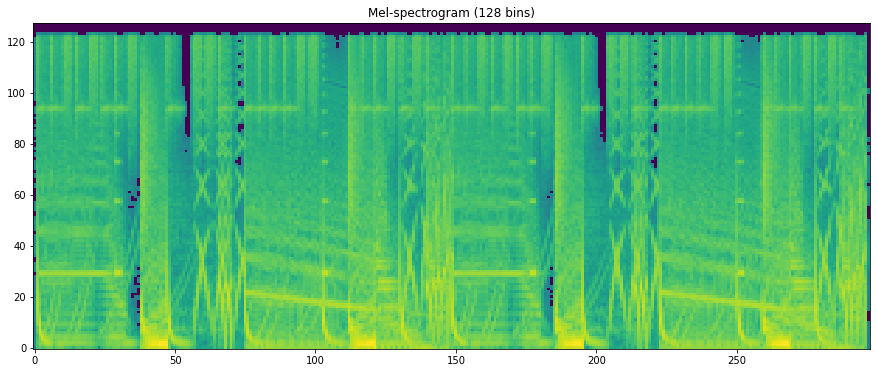

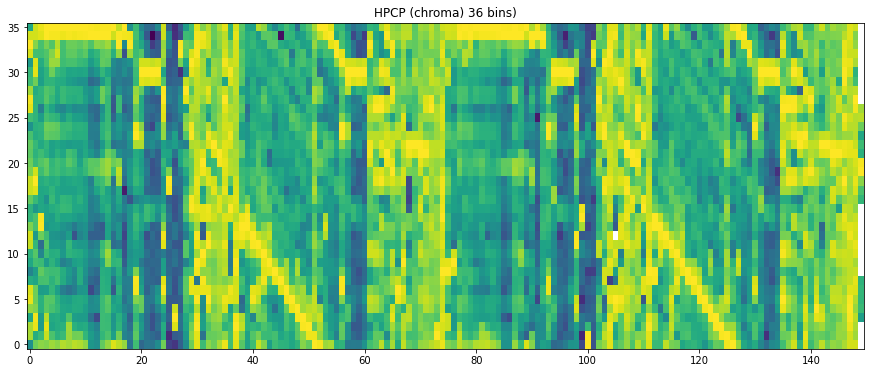

In [36]:
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default

imshow(features_frames['lowlevel.melbands128'].T, 
       aspect='auto', origin='lower', interpolation='none', norm=colors.LogNorm())
plt.title("Mel-spectrogram (128 bins)")
show()

imshow(features_frames['tonal.hpcp'].T, 
       aspect='auto', origin='lower', interpolation='none', norm=colors.LogNorm())
plt.title("HPCP (chroma) 36 bins)")
show()


## Metadata
The pools include the input audio file metadata in addition to the audio analysis results. This is useful to allow you tracking down some of the details about the analyzed files. MusicExtractor uses the [MetadataReader](https://essentia.upf.edu/reference/std_MetadataReader.html) algorithm internally for ID3 tags and similar track metadata. Those are stored inside `metadata.tags` if they are present.

In [6]:
print("Essentia version:", features['metadata.version.essentia'])
print("Essentia version git SHA:", features['metadata.version.essentia_git_sha'])
print("Essentia MusicExtractor version:", features['metadata.version.extractor'])

Essentia version: 2.1-beta6-dev
Essentia version git SHA: v2.1_beta5-409-g84e4a6ee-dirty
Essentia MusicExtractor version: music 2.0


In [17]:
print("Filename:", features['metadata.tags.file_name'])
print("MD5 hash for the encoded audio:", features['metadata.audio_properties.md5_encoded'])
print("Audio bit rate:", features['metadata.audio_properties.bit_rate'])
print("Audio codec:", features['metadata.audio_properties.codec'])
print("Duration (seconds):", features['metadata.audio_properties.length'])
print("Number of channels (mono or stereo):", features['metadata.audio_properties.number_channels'])

Filename: dubstep.mp3
MD5 hash for the encoded audio: 1e5a598218e9b19cfe04d6c2f61f84a6
Audio bit rate: 192000.0
Audio codec: mp3float
Duration (seconds): 6.896326541900635
Number of channels (mono or stereo): 2.0


## Storing results to files
In many situations, we may want to analyze multiple tracks and store results for further processing. We can use the [YamlOutput](https://essentia.upf.edu/reference/std_YamlOutput.html) algorithm to store the pools with the analysis results from MusicExtractor to either JSON or YAML formats.

In [40]:
# Write the aggregated features into a temporary directory.
from tempfile import TemporaryDirectory
temp_dir = TemporaryDirectory()
results_file = temp_dir.name + '/results.json'

es.YamlOutput(filename=results_file, format="json")(features)

# Preview the resulting file.
!cat $results_file

{
"metadata": {
    "version": {
        "essentia": "2.1-beta6-dev",
        "essentia_git_sha": "v2.1_beta5-409-g84e4a6ee-dirty",
        "extractor": "music 2.0"
    },
    "audio_properties": {
        "analysis": {
            "equal_loudness": 0,
            "length": 6.8963265419,
            "sample_rate": 44100,
            "start_time": 0,
            "downmix": "mix"
        },
        "bit_rate": 192000,
        "length": 6.8963265419,
        "lossless": 0,
        "number_channels": 2,
        "replay_gain": -13.2472438812,
        "sample_rate": 44100,
        "codec": "mp3float",
        "md5_encoded": "1e5a598218e9b19cfe04d6c2f61f84a6"
    },
    "tags": {
        "file_name": "dubstep.mp3",
        "encoding": ["Lavf53.21.1"]
    }
},
"lowlevel": {
    "average_loudness": 0.980225086212,
    "barkbands_crest": {
        "mean": 10.9271945953,
        "stdev": 5.24087572098
    },
    "barkbands_flatness_db": {
        "mean": 0.124555200338,
        "stdev": 0.0663392